# Figure 2 Replication

This page contains the code to replicate Figure 2 in the paper which shows period 1 and period 2 consumption levels under various possible contracts.

## Code

Several functions used can be found in the python module [Contract.py](Contract.py)

In [1]:
import Contract

Code below uses this module to produce Figure 2.  If code is hidden in HTML view, click button to display.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact,fixed
plt.rcParams['figure.figsize'] = 10, 8
np.set_printoptions(precision=2) 

We have code that draws the main Figure 2 diagram for any (Competitive or Monoopoly) Contract instance `C`. This function by itself does not draw in the no-renegotiation constraint.

In [58]:
def Figure2(C, idlines = False):
    cF = C.fcommit()    # point F
    cRP = C.reneg_proof()  # point P
    cR = C.reneg(cRP)  # point R
    btr = C.beta**(1/C.rho)
    q1 = (cRP[1]+cRP[2])/(1+btr)
    q2 = btr*q1
    
    
    y = C.y
    fig, ax = plt.subplots()
   
    c1max = 120
    c1 = np.arange(c1max)
    ubar0 = C.PVU(cRP[1:3], 1.0)
    id0 = C.indif(ubar0, 1.0)
    ubar1 = C.PVU(cRP[1:3], C.beta)
    id1 = C.indif(ubar1, C.beta)

    #ubar0RP = cM.PVU(cCRP[1:3], 1.0)
    #idc0RP = cM.indif(ubar0RP,1.0)
    #ubar1RP = cC.PVU(cMRP[1:3], cC.beta)
    #idc1RP = cM.indif(ubar1RP,cC.beta)
    
    # contract points and coordinate lines http://bit.ly/1CaTMDX
    xx = [cF[1], cRP[1], cR[1], q1]
    yy = [cF[2], cRP[2], cR[2], q2]
    ax.scatter(xx, yy, s=35, marker='o',color='k', zorder=10)


    # indifference curves (slicing to clip indif curve lengths)
    s0 = slice(int(cF[1])-15, int(cR[1])+2)
    s1 = slice(int(cF[1])-7, int(cR[1])+19)
    ax.plot(c1[s0], id0(c1[s0]), color='blue')  # --Zeros's indif through F        
    ax.plot(c1[s1], id1(c1[s1]), color='red')   # --One's indif through F

    #plotpts(cF, cR, cRP)
    
    # rays
    ax.plot(c1[:85], c1[:85],':',color='black')
    ax.plot(c1[:113], C.beta**(1/C.rho)*c1[:113],':',color='black')


    # isoprofit line(s)
    isoprofline = C.isoprofit(C.profit(cRP,C.y) - (y[0]-cRP[0]), y)
    ax.plot(c1,  isoprofline(c1),':' )
    ax.text(c1[s0.stop]-2, id0(c1[s0.stop])+2, 'Zero-self', fontsize=11)
    ax.text(c1[s0.stop]+2, id0(c1[s0.stop]), 'indifference curve', fontsize=11)
    ax.text(c1[s1.stop]-3, id1(c1[s1.stop])+2, 'One-self', fontsize=11)
    ax.text(c1[s1.stop]+2, id1(c1[s1.stop]),  'indifference curve', fontsize=11)  

    isoproflineK = C.isoprofit(C.profit(cRP,C.y)-(y[0]-cRP[0]) + C.kappa, y)
    ax.plot(c1,  isoproflineK(c1),':' )

    # Axes
    ax.set_xlim(0, c1max), ax.set_ylim(0, cF[1]+15)
    ax.spines['right'].set_color('none'), ax.spines['top'].set_color('none')

    ax.xaxis.tick_bottom(), ax.yaxis.tick_left()
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
 
    ax.text(c1max-4, -3, '$c_{1}$', fontsize=12)
    ax.text(-5, cF[1]+10, '$c_{2}$', fontsize=12)
    
    ax.text(cF[1]-2, cF[2]+1, r'$F$', fontsize=11)
    ax.text(cRP[1]+1.5, cRP[2]+1.5, r'$C$', fontsize=15)   
    ax.text(cR[1]-3, cR[2]-3, r'$R$', fontsize=15)
    ax.text(q1+0.5, q2+1.5, r'$Q$', fontsize=15)
    
    
    #-- Intercept points on y axis
    ax.scatter(cRP[1]+cRP[2],0, marker='o',color='k', zorder=10)
    ax.scatter(cRP[1]+cRP[2]- C.kappa, 0, marker='o',color='k', zorder=10)
    
    
    ax.text(cRP[1]+cRP[2]  , -3, r'$c_1^P+c_2^P$', fontsize=11)
    ax.text(cRP[1] + cRP[2] - C.kappa - 9, -3, r'$c_1^P+c_2^P -\bar \kappa$', fontsize=11)
    
    
    

A separate function `nrpline(C)` draws the no-renegotiation Constraint for contract `C`.   

In [59]:
def nrpline(C):
     '''plot points from C.rpc() along no renegotiation constraint '''
     num = 150
     beta, rho, btr, kap, _ = C.params()
     c1rp, c2rp  = np.zeros(num), np.zeros(num)
     for i, s in enumerate(np.arange(30, 30+num)):
         c1rp[i], c2rp[i] = C.rpc(s)
     plt.plot(c1rp, c2rp, color='g')
     plt.xlim(0,120),  plt.ylim(0,C.fcommit()[1]+15)
     plt.text(c1rp[90]+2, c2rp[120], 'no-renegotiation', fontsize=11)
     plt.text(c1rp[90]+4, c2rp[115], 'constraint', fontsize=11)
     plt.grid()

We wrap these two functions to have the option to plot them both, and later interactively set options.

## Figure 2

In [60]:
# Wrap Figure2 to allow passing parameters to interactive widget 
def Fig2(kap=9, beta = 0.4, rho = 0.6, competitive = True, rpc = False):
    if competitive:
        C = Contract.Competitive(beta)
    else:
        C = Contract.Monopoly(beta)
    C.rho = rho
    C.kappa = kap
    Figure2(C, idlines=False)
    if rpc:
       nrpline(C)
    plt.savefig('Figure2.pdf')    

Without a no-renegotiation line:

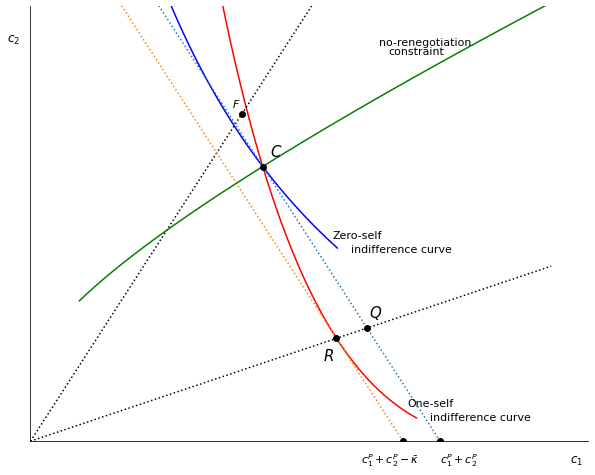

In [61]:
Fig2(kap= 8, beta = 0.4, rho = 0.6, competitive =True, rpc=True)

With the no-renegotiation line drawn in.

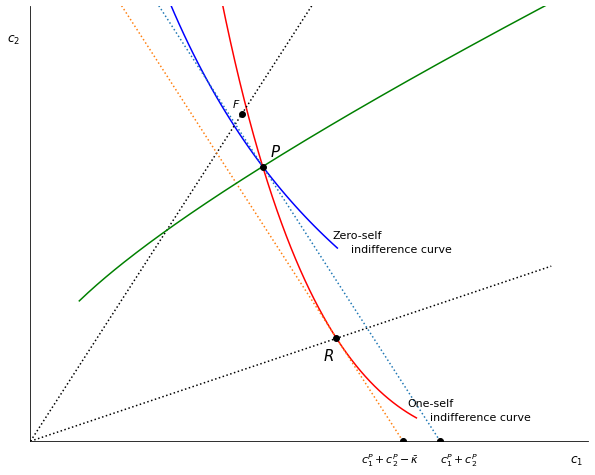

In [7]:
Fig2(kap= 8, beta = 0.4, rho = 0.6, competitive =True, rpc=True)

## Interactive Plot

In order for the widget sliders to affect the chart you must be running this on a jupyter notebooks server.  If you are viewing this on the web, click on the Rocket icon button above to launch a cloud server service (Binder, or google colab).

The same diagram can display Monopoly or Competitive Contracts. 

In [11]:
interact(Fig2, kap = (0,20,0.5), beta = (0.3, 0.95, 0.05), rho=(0.3,1.2,0.1) );

interactive(children=(FloatSlider(value=9.0, description='kap', max=20.0, step=0.5), FloatSlider(value=0.4, de…

The parameters ($\beta = 0.4$, $\rho = 0.8$) used were chosen to exagerate curvature and spacing for presentation clarity but the essential relationships hold for more reasonable assumptions. In the interactive further below you can vary the parameters yourself using sliders.